### The Machine Learning Workflow

### 1. Define Business Goal:
- Achieve high accuracy on titanic kaggle data set
- Rough guide (kaggle test score submissions):
    - EASY: >75%
    - MEDIUM: >77.5%
    - HARD: >80%

### 2. Get Data
- Data comes in 2 csv files
    - `train.csv` <--Only use this for now!!!
    - `test.csv` <---Only need this later in the week!!

In [680]:
import pandas as pd
df = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [681]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Split the data into X and y
- Supervised Learning

In [682]:
X = df.drop('Survived', axis=1)
X = df[['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X = df[['Age', 'Sex', 'Fare']]

In [683]:
y = df['Survived']

In [684]:
type(X)

pandas.core.frame.DataFrame

In [685]:
X.shape #matrix, multi-dimensional (M, N)

(891, 3)

In [686]:
y.shape #vector, single array (M, )

(891,)

### 3. Train-Test-Split

In [687]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% -> training, 20% -> testing

In [688]:
X_test.head()

,Age,Sex,Fare
709,NaN,male,15.2458
439,31.0,male,10.5000
840,20.0,male,7.9250
720,6.0,female,33.0000
39,14.0,female,11.2417


In [689]:
# Feature engineering - convert to numbers

In [690]:
femalecol=pd.get_dummies(X_train['Sex'])['female']
X_train = pd.concat ((X_train,femalecol),1)
X_train = X_train.drop('Sex', axis=1)
X_train.head()

femalecol2=pd.get_dummies(X_test['Sex'])['female']
X_test=pd.concat ((X_test,femalecol2),1)
X_test = X_test.drop('Sex', axis=1)
X_test.head()

#X_train['Female']=pd.get_dummies(X_train['Sex']).loc['female']

,Age,Fare,female
709,NaN,15.2458,0
439,31.0,10.5000,0
840,20.0,7.9250,0
720,6.0,33.0000,1
39,14.0,11.2417,1


In [691]:
# Malte: you  should have exactly 1 ColumnTransformer in your notebook

fe = ColumnTransformer([
    ('ageimputer', SimpleImputer(strategy='median'), ['Age']),
#    ('onehotSex', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex']), 
    ('femalesex', 'passthrough', ['female']),
    ('fareimputer', SimpleImputer(strategy='median'), ['Fare']),

    # fill missing values
    
    # convert gender to binary columns

    
#    ('do_nothing', 'passthrough', ['Pclass']),

#    ('onehotPclass', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass']), 

    #    ('onehotEmbarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Embarked']), 

#    ('scaler', MinMaxScaler(), ['Pclass']),    
    
    #('do_nothing', 'passthrough', ['Body Mass (g)'])
    # label         name of CT     columns to be transformed
])

In [692]:
fe.fit(X_train)
Xtrans = fe.transform(X_train)

In [693]:
#k = fe.named_transformers_['onehotSex']
#type(k)
#ohe = k.named_steps['onehotSex']
#ohe.get_feature_names()

In [694]:
print(Xtrans)

[[ 45.5      0.      28.5   ]
 [ 23.       0.      13.    ]
 [ 32.       0.       7.925 ]
 ...
 [ 41.       0.      14.1083]
 [ 14.       1.     120.    ]
 [ 21.       0.      77.2875]]


In [695]:
# 1. create a model
#model = LogisticRegression()  # creates a fresh model with parameters not fitted
# 2. train with training data
#model.fit(Xtrans, y_train)  # <-- does the differential calculus optimization gradient descent magic

In [696]:
# Decision Tree model
m = DecisionTreeClassifier(max_depth=4)
m.fit(Xtrans, y_train)

DecisionTreeClassifier(max_depth=4)

In [697]:
round(m.score(Xtrans, y_train), 3)  # --> train accuracy

0.813

In [698]:
Xtrans_test = fe.transform(X_test)

In [699]:
round(m.score(Xtrans_test, y_test), 3)  # --> test accuracy

0.777

[Text(558.0, 733.86, 'female <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(245.52, 570.78, 'age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(89.28, 407.70000000000005, 'fare <= 20.825\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(44.64, 244.62, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(133.92000000000002, 244.62, 'fare <= 64.379\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(89.28, 81.54000000000008, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(178.56, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(401.76, 407.70000000000005, 'fare <= 26.269\ngini = 0.271\nsamples = 445\nvalue = [373, 72]'),
 Text(312.48, 244.62, 'age <= 13.5\ngini = 0.2\nsamples = 329\nvalue = [292, 37]'),
 Text(267.84000000000003, 81.54000000000008, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(357.12, 81.54000000000008, 'gini = 0.192\nsamples = 326\nvalue = [291, 35]'),
 Text(491.04, 244.62, 'fare <= 26.419\ngini = 0.421\ns

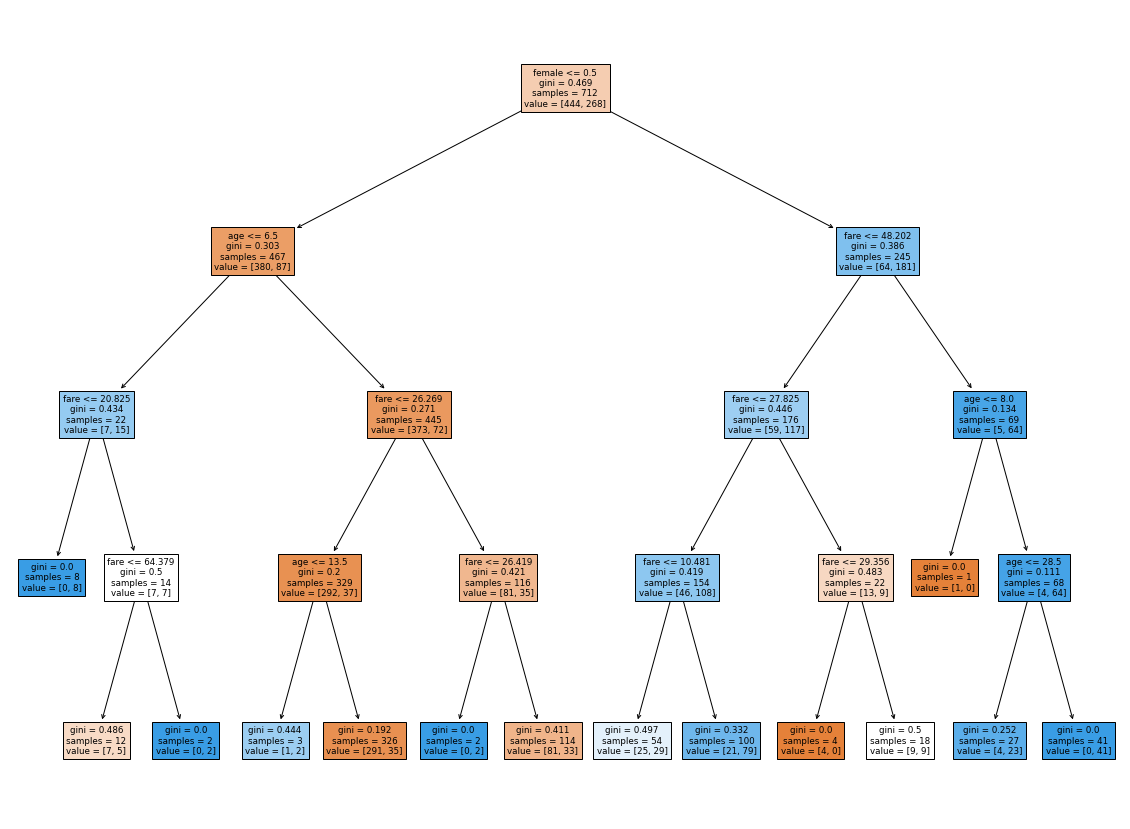

In [700]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(m, feature_names=['age', 'female', 'fare'], filled=True)
#None # makes strange text output go away